<a href="https://colab.research.google.com/github/Lucasrichards19/Data-science/blob/main/Streaming_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tweeter setiment analysis with VADER

**Utilize a Sentiment Dictionary to decipher the sentiment of text**

A sentiment dictionary is the mapping of words to sentiment values. For example: the word awesome (which is a positive sentiment) could have a value of +3.7 and the word horrible (which is a negative sentiment) could have a value of -3.1. While using a sentiment dictionary, the values of the sentiment words are summed to get the overall sentiment of the text. 

For example: I loved the ambience of the restaurant but the drive to the restaurant was horrendous. Overall, it was a good evening.

Now let's say the value of the word love is +3.9, the value of the word horrendous is -4.2 and the value of the word good is +2.9. So, the overall sentiment of the text is positive since the aggregate of the values of the sentiment words is positive. 

We will apply **VADER** Sentiment analysis to tweets. VADER stands for Valence Aware Dictionary for Sentiment Reasoning. The dictionary was designed specifically for Twitter and contains emoticons and slang. **It also provides support for sentiment intensifiers  (words such as incredibly funny) and negations (words such as "not bad" which is a slight/small positive sentiment)**. 

How it works? VADER analyzes a piece of text to check if any of the words in the text are present in the lexicon. It  produces 4 sentiment metrics from the word ratings i.e. positive, neutral, negative and compound. The compound score is the sum of all of the lexicon ratings which is standardized to a range between -1 and 1.

In [1]:
import pandas as pd
import numpy as np
import os
import json
import glob
from datetime import datetime

In [2]:
# Install the VADER Sentiment package

!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 6.3 MB/s 


In [3]:
#Load the SentimentIntensityAnalyzer object from the VADER package
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Create a handle to the SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

#function that outputs the sentiment ratings
def print_sentiment_ratings(sentence):
    sent = analyzer.polarity_scores(sentence)
    print("{} {}".format(sentence, sent))
    
#Examining the sentiment ratings for different pieces of text
#No sentiment expressed

print_sentiment_ratings("I have to work on the weekend")

#Overall rating is neutral

I have to work on the weekend {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [4]:
#Sentiment expressed via emoticon

print_sentiment_ratings("I have to work on the weekend :(")

#Overall rating is negative

I have to work on the weekend :( {'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'compound': -0.4404}


In [ ]:
#Expressing a more intense feeling via 2 emoticons

print_sentiment_ratings("I have to work on the weekend :( :(")

#Overall rating is even more negative than the above piece of text

I have to work on the weekend :( :( {'neg': 0.453, 'neu': 0.547, 'pos': 0.0, 'compound': -0.7003}


In [ ]:
#VADER handles emotion intensifiers (i.e. words such as very, really, super, etc.)

print_sentiment_ratings("I did well on the test")

#The sentiment rating for the sentence below is higher than the one above

print_sentiment_ratings("I did very well on the test")

I did well on the test {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.2732}
I did very well on the test {'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.3384}


In [ ]:
#VADER takes into consideration how the words are written - capitalization has an impact on the sentiment ratings

print_sentiment_ratings("I had a super day")

#The sentiment rating for the sentence below is higher than the one above

print_sentiment_ratings("I had a SUPER day")

I had a super day {'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'compound': 0.5994}
I had a SUPER day {'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.6841}


In [ ]:
#Finally, VADER handles changes in sentiment intensity; specifically when a sentence contains the word "but". Higher weighting is given to the sentiment after the word "but".
#The overall rating for the sentence below is negative

print_sentiment_ratings(" I loved the ambience of the restaurant but the drive to the restaurant was horrendous")

 I loved the ambience of the restaurant but the drive to the restaurant was horrendous {'neg': 0.252, 'neu': 0.63, 'pos': 0.119, 'compound': -0.5789}


**Build a Twitter Sentiment Analyzer**

A common question that often arises is how do I decipher the sentiment within a large set of tweets regarding a specific topic on Twitter in an autonomous fashion. Now, we will construct a Twitter Sentiment Analyzer. The Sentiment Analyzer will search twitter for a list of tweets about any topic of choice, then it will analyze each tweet to ascertain whether a positive or negative emotion is expressed in the tweet. 

**Prerequisites:**

Before we go through the tutorial, the following items need to be taken care of:

**1)** Register for the Twitter API - a) Go to https://apps.twitter.com, b) click on "Create New Application", c) Under Application details, enter name, description, website details (can be anything), d) click on "Create Application" and e) make a note of the tokens on the "Keys and Access Tokens" tab
 
**2) **Install dependencies: a) pip install tweepy - library for accessing the twitter API, b) VADER sentiment package

**Install tweepy**

In [5]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Authenticate with Twitter**

In [8]:
#Import tweepy
import tweepy

#Define 4 variables for authenticating with Twitter
#Each student will have their own unique tokens
consumer_key = 'ydu51yQCBwDc1h4Dq20KVmV6S'
consumer_secret= 'KCVTGrye09VyLkOmGC67Qa0JdVVniJUPKz92urGwHvQGeC5K2u'

access_token = '1578188238413389825-ef2SY6qbch8PcsBi1QPaUWvQQbOP32'
access_token_secret = 'lSA86em4yAftr16JFUlVgkzwdqyS9jpCNe3sMLUSl8eb3'

#Autenticate with Twitter
authen = tweepy.OAuthHandler(consumer_key, consumer_secret)
authen.set_access_token(access_token, access_token_secret)

**Search twitter for a list of tweets about any topic of choice, then it will analyze each tweet to ascertain whether a positive or negative emotion is expressed in the tweet. **

In [9]:
#Get a connection to Twitter
tweetapi = tweepy.API(authen)

#This method is going to return tweets that contain the word 
visible_public_tweets = tweetapi.search('president')

print(f"Retrieved {len(visible_public_tweets)} tweets")

Retrieved 15 tweets


In [14]:
visible_public_tweets

[Status(_api=<tweepy.api.API object at 0x7fdc48a56e90>, _json={'created_at': 'Tue Nov 29 12:17:16 +0000 2022', 'id': 1597565354791735296, 'id_str': '1597565354791735296', 'text': 'RT @ennybest29: Dear Nigerians, for the sake of your future kids vote for Peter Obi for president 2023. #ObiDatti2023 https://t.co/o7vXSo3C…', 'truncated': False, 'entities': {'hashtags': [{'text': 'ObiDatti2023', 'indices': [104, 117]}], 'symbols': [], 'user_mentions': [{'screen_name': 'ennybest29', 'name': 'A. E. E', 'id': 496175653, 'id_str': '496175653', 'indices': [3, 14]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1380117510008270850, 'id_str': '1380117510008270850', 'name': 'DANY', 'screen_name': 'dany_infern

In [10]:
# Iterate through the tweets that have been retrieved
# Append VADER sentiment scores

tweet_id = []
tweet_lang = []
tweet_created_at = []
tweet_retweet_count = []
tweet_text = []

tweet_sentiment_score = []
sentiment_df = pd.DataFrame(columns=\
  ['id', 'lang', 'created_at', 'retweet_count',
   'text' ,'sentiment_score'])


for tweet in visible_public_tweets:
    analyzer = SentimentIntensityAnalyzer()

    tweet_id.append(str(tweet.id))
    tweet_lang.append(str(tweet.lang))
    tweet_created_at.append(str(tweet.created_at))
    tweet_retweet_count.append(str(tweet.retweet_count))    
    tweet_text.append(str(tweet.text))

    tweet_sentiment_score.append(str(analyzer.polarity_scores(tweet.text)["compound"]))


sentiment_df['id'] = tweet_id
sentiment_df['lang'] = tweet_lang
sentiment_df['created_at'] = tweet_created_at
sentiment_df['retweet_count'] = tweet_retweet_count
sentiment_df['text'] = tweet_text

sentiment_df['sentiment_score'] = tweet_sentiment_score

sentiment_df['text'] = sentiment_df['text'].str.replace('\n', ' ')


# Create a positive / negative sentiment variable
sentiment_df['sentiment'] = np.where(sentiment_df['sentiment_score'].astype(np.float) > 0, 'Positive', 'Negative')
sentiment_df['sentiment'] = np.where(sentiment_df['sentiment_score'].astype(np.float) == 0, 'Neutral', sentiment_df['sentiment'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [11]:
sentiment_df

,id,lang,created_at,retweet_count,text,sentiment_score,sentiment
0,1597565354791735296,en,2022-11-29 12:17:16,26,"RT @ennybest29: Dear Nigerians, for the sake o...",0.3818,Positive
1,1597565354569781248,en,2022-11-29 12:17:16,169,RT @JaypeeGeneral: Nigerians are united by Pet...,0.4753,Positive
2,1597565353650839597,en,2022-11-29 12:17:16,30,RT @ForeverwithRM: excuse me kim namjoon?? htt...,0.168,Positive
3,1597565353202049024,en,2022-11-29 12:17:16,33762,RT @elonmusk: @TimRunsHisMouth I’m fine with T...,-0.5848,Negative
4,1597565353034674176,en,2022-11-29 12:17:16,70,RT @wtpBLUE: Decades of outsourcing eroded dom...,-0.2023,Negative
5,1597565352510038019,en,2022-11-29 12:17:16,984,RT @SaharaReporters: BREAKING: Delta State Ret...,-0.7906,Negative
6,1597565350211514368,en,2022-11-29 12:17:15,0,#世界杯 https://t.co/kULmOhb0B1 President woman ...,0.8807,Positive
7,1597565350182551553,en,2022-11-29 12:17:15,157,RT @cmonama: I’m proud to call this man MY PRE...,0.5255,Positive
8,1597565350148657154,en,2022-11-29 12:17:15,2,RT @alexander_minh: 1/ A member of the questio...,-0.296,Negative
9,1597565349775699976,ja,2022-11-29 12:17:15,0,コーチャンフォー。いろいろすごい。 ついに食品まで売り始めた…釧路発の巨大書店が｢1日中い...,0.0,Neutral


**Graph sentiment polarity extracted from tweets**

In the code above, we explored how to connect to Twitter, fetched tweets from twitter on a specific topic and then examined the sentiment of the tweets.  VADER compound score is a float within the range [-1.0, 1.0] where a score greater than 0.0 indicates positive sentiment whereas a score less than 0.0 indicates negative sentiment.

Now, we will create a listener class that continuously listens for tweets on a specific topic, detects the sentiment of the fetched tweets and persists them to a file.

In [ ]:
#In Tweepy, an instance of tweepy.Stream establishes a streaming session and routes messages to StreamListener instance. So first, we need to import the requisite classes

import tweepy

# from tweepy import Stream
# from tweepy.streaming import StreamListener

In [ ]:
path_tweets = '/tweet_output'

if not os.path.isdir(path_tweets): os.mkdir(path_tweets)

In [ ]:
# Remove existing data

file_list = glob.glob(os.path.join(path_tweets, '*.json'))

for f in file_list:
    os.remove(f)

In [ ]:
# Overall tweet volume to collect
MAX_TWEETS = 1000

# Number of tweets to include in a batch for saving
NUM_BATCH = 100

#override tweepy.StreamListener to add logic to on_status
class NickCustomStreamListener(tweepy.StreamListener):
    collected_data = []
    collected_count = 0

    def on_data(self, data):
        all_data = json.loads(data)
        if 'text' in all_data:
          # append collector with tweet enriched by sentiment score
          self.collected_data.append({
              "tweet": all_data["text"],
              "created_at": all_data["created_at"],
              "retweeted": all_data["retweeted"],
              "username": all_data["user"]["screen_name"],
              "user_tz": all_data["user"]["time_zone"],
              "user_location": all_data["user"]["location"],
              "sentiment_score": str(analyzer.polarity_scores(all_data["text"])["compound"])
          })
          # increase count of tweets collected
          self.collected_count += 1
          # batch size achieved
          if self.collected_count % NUM_BATCH == 0:
            now = datetime.now()
            now_timestamp = int(now.timestamp())
            with open(f"{path_tweets}/tweets-crawled-{now_timestamp}.json", "w") as f:
              f.write(json.dumps(self.collected_data))
            # empty batch collector to free-up memory
            self.collected_data = []
          # stop process when max tweets reached
          if self.collected_count > MAX_TWEETS:
            # stop iterations
            return False
          # continue iterations
          return True
        else:
          return True
    def on_error(self, status):
        print(status)


myStreamListener = NickCustomStreamListener()
myStream = tweepy.Stream(auth = authen, listener=myStreamListener)

In [ ]:
myStream.filter(track=["student"], languages = ["en"], stall_warnings = True)

In [ ]:
# Review collected JSON objects

file_list = glob.glob(os.path.join(path_tweets, '*.json'))
file_list

['/tweet_output/tweets-crawled-1651178336.json',
 '/tweet_output/tweets-crawled-1651178325.json',
 '/tweet_output/tweets-crawled-1651178346.json',
 '/tweet_output/tweets-crawled-1651178359.json',
 '/tweet_output/tweets-crawled-1651178391.json',
 '/tweet_output/tweets-crawled-1651178380.json',
 '/tweet_output/tweets-crawled-1651178403.json',
 '/tweet_output/tweets-crawled-1651178313.json',
 '/tweet_output/tweets-crawled-1651178302.json',
 '/tweet_output/tweets-crawled-1651178368.json']

In [ ]:
# Read collected tweets into Pandas dataframe

tweets_df = pd.DataFrame()

for file in file_list:
    temp = pd.read_json(file, orient='records')    
    tweets_df = tweets_df.append(temp, ignore_index = True)


print(f"Number of tweets collected: {tweets_df.shape[0]}")
print(f"Min sentiment: {tweets_df['sentiment_score'].min()}")
print(f"Average sentiment: {tweets_df['sentiment_score'].mean()}")
print(f"Max sentiment: {tweets_df['sentiment_score'].max()}")

Number of tweets collected: 1000
Min sentiment: -0.9184
Average sentiment: -0.014688300000000048
Max sentiment: 0.9525


In [ ]:
pd.set_option('display.max_colwidth', None)

tweets_df[['created_at', 'tweet', 'sentiment_score']]

,created_at,tweet,sentiment_score
0,2022-04-28 20:38:40+00:00,RT @KatiePavlich: White House now arguing it is fine to force others to pay for student loans they didn't take out so the people who took o…,-0.3818
1,2022-04-28 20:38:40+00:00,"RT @lavern_spicer: The GDP fell 1.4% putting us on a definite course for recession this summer, but BY ALL MEANS, cancel student debt and g…",-0.7269
2,2022-04-28 20:38:40+00:00,RT @axidentaliberal: @MittRomney Tuition costs skyrocketed for 20 years\n\nSo student debt grew over 100% in the past decade\n\nThe average is…,-0.4173
3,2022-04-28 20:38:40+00:00,RT @KatiePavlich: White House now arguing it is fine to force others to pay for student loans they didn't take out so the people who took o…,-0.3818
4,2022-04-28 20:38:40+00:00,RT @KateDawsonPhD: We are inviting anyone 18+ who attended secondary school in #Ireland to anonymously share their experience of teacher-st…,0.5423
...,...,...,...
995,2022-04-28 20:39:23+00:00,"@ChattahoocheeJB @lifelibertybart Better yet, get the federal government out of the student loan business and watch… https://t.co/rzWbYMedGW",0.4404
996,2022-04-28 20:39:23+00:00,RT @PEIschoolfood: 19.2% of children on PEI don’t have access to the food they need. That’s why the PEI School Food Program operates as Pay…,0.0000
997,2022-04-28 20:39:23+00:00,"RT @CFA_United: Caste is now a protected category at the @calstate system, thanks to student, faculty, and staff activists, and CFA union…",0.7003
998,2022-04-28 20:39:23+00:00,RT @NBSaphierMD: This child’s tragic death is on every policymaker and subsequent official who said unvaccinated kids were dangerous to oth…,-0.8750


#### Plotting sentiment analysis over time

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

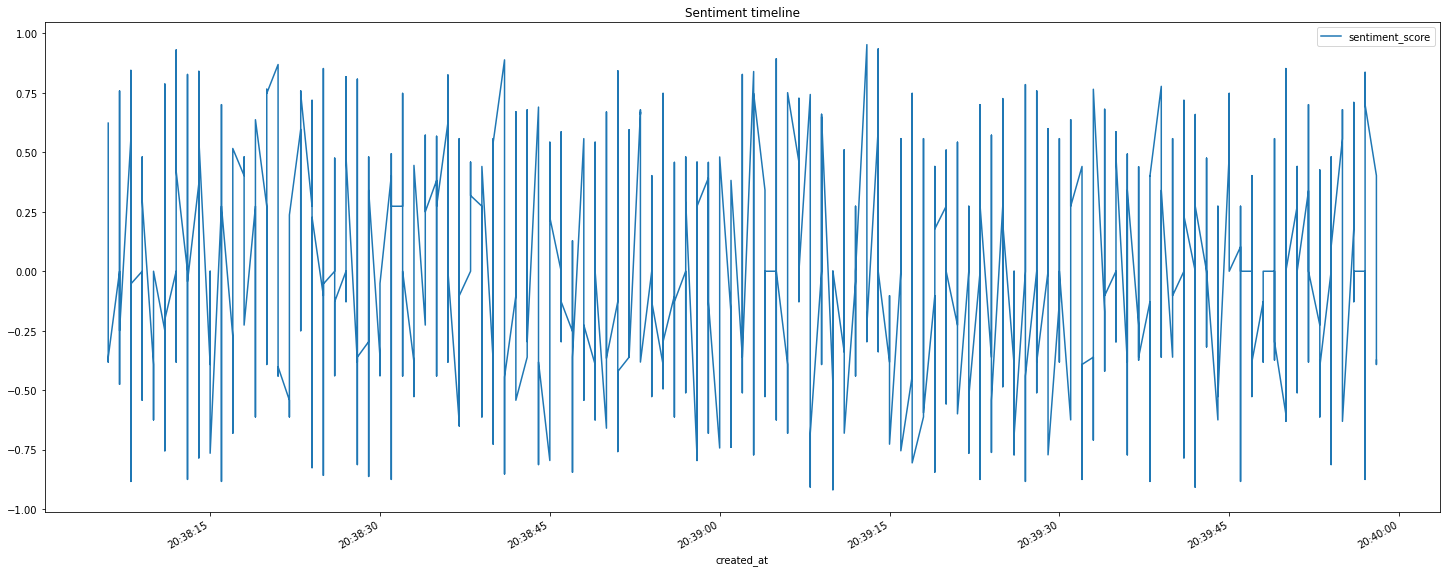

In [ ]:
plt.rcParams["figure.figsize"] = (25,10)

tweet_timeline_df = tweets_df.copy()
tweet_timeline_df = tweet_timeline_df[['created_at', 'sentiment_score']].set_index('created_at')


tweet_timeline_df.plot()
plot = plt.title(f'Sentiment timeline')

In [ ]:
import datetime
import pytz

datetime.datetime.now(pytz.timezone('US/Central')).strftime("%a, %d %B %Y %H:%M:%S")

'Thu, 28 April 2022 15:40:04'